In [1]:
from pyspark.ml.regression import RandomForestRegressionModel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the Model ---
model_path = "gs://imdbreviews-bucket/models/imdb_model"  # Update this with your model path
rf_model = RandomForestRegressionModel.load(model_path)

# --- Load the Test Predictions Data ---
rating_predictions_path = "gs://imdbreviews-bucket/models/rating_predictions/*"  # Update this with your data path
predictions = spark.read.parquet(rating_predictions_path)

# --- Convert Predictions to Pandas ---
predictions_df = predictions.select("rating", "prediction").toPandas()

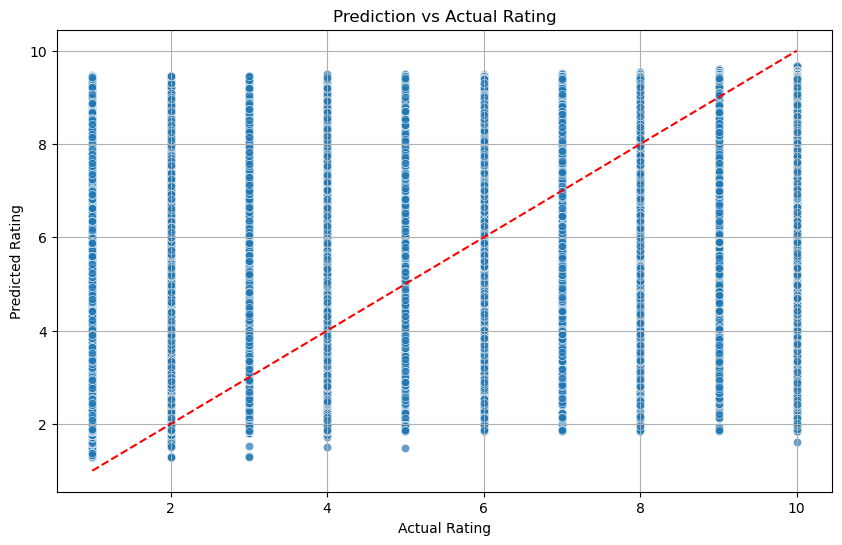

In [2]:
# --- Visualization 1: Scatter Plot (Prediction vs Actual) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x="rating", y="prediction", data=predictions_df, alpha=0.7)
plt.plot([predictions_df["rating"].min(), predictions_df["rating"].max()], 
         [predictions_df["rating"].min(), predictions_df["rating"].max()], 
         color='red', linestyle="--")
plt.title("Prediction vs Actual Rating")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.grid(True)
plt.show()

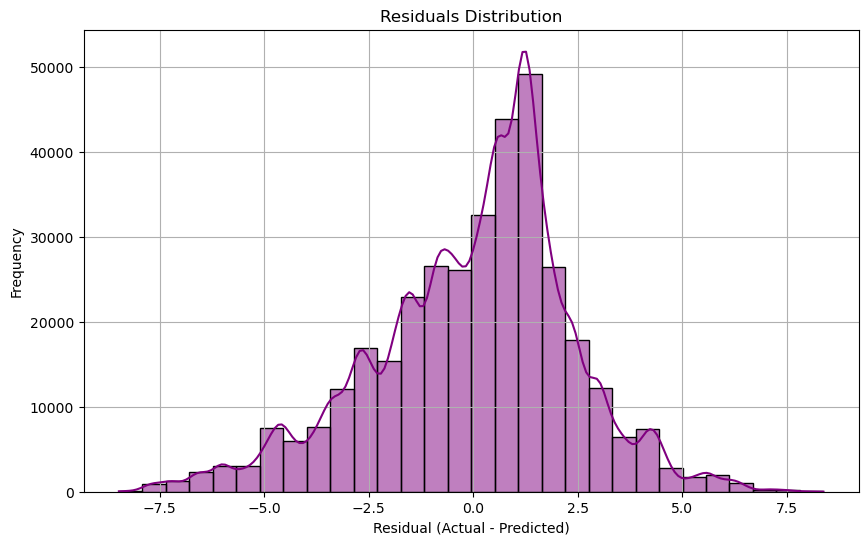

In [3]:
# --- Visualization 2: Residual Distribution ---
predictions_df["residual"] = predictions_df["rating"] - predictions_df["prediction"]
plt.figure(figsize=(10, 6))
sns.histplot(predictions_df["residual"], kde=True, bins=30, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

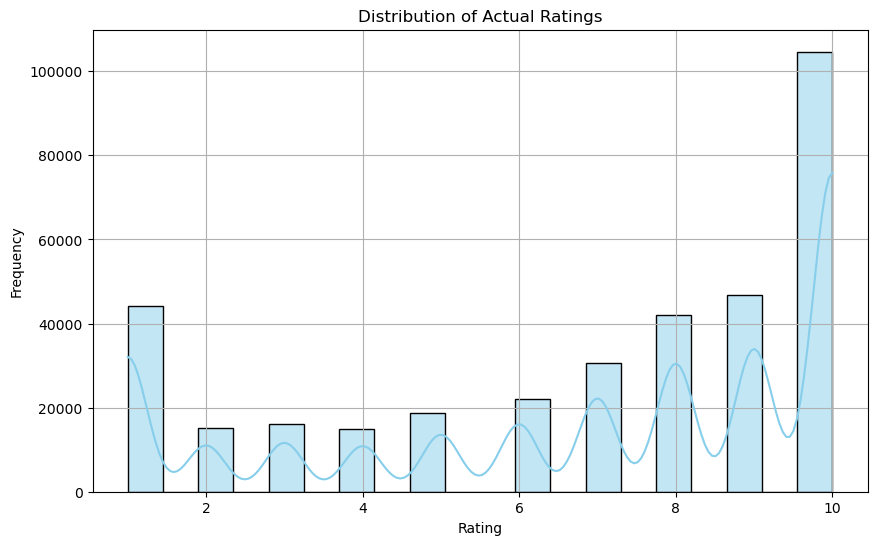

In [5]:
# --- Visualization 3: Actual Ratings Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(predictions_df["rating"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Actual Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

/tmp/ipykernel_33512/44251520.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=top_features, palette="viridis")


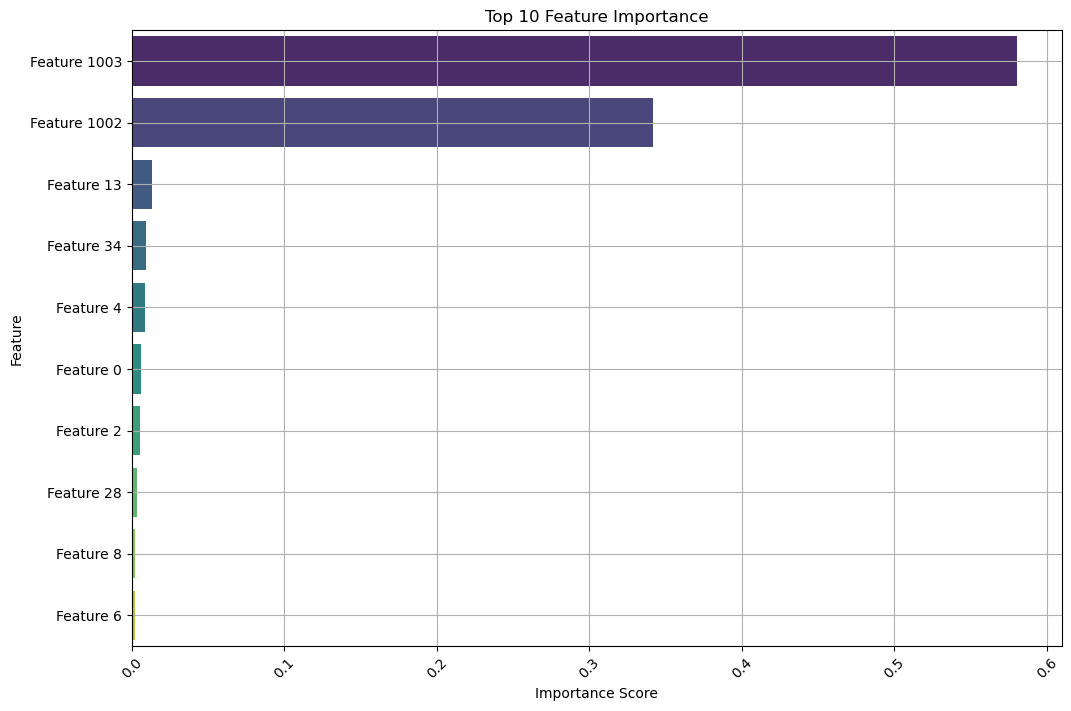

In [6]:
# Visualization 4: Sort features by importance
top_features = importances.sort_values(by="importance", ascending=False).head(10)  # Show top 10 features

# Plot the top features
plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=top_features, palette="viridis")
plt.title("Top 10 Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
print(predictions_df[['rating', 'prediction']].head(20))

    rating  prediction
0      3.0    1.842488
1      5.0    6.380110
2      7.0    7.699441
3      8.0    7.577520
4      1.0    1.842488
5      1.0    2.427801
6      1.0    6.573534
7      1.0    3.851681
8      1.0    5.612605
9      2.0    5.378328
10     2.0    4.464067
11     2.0    5.350570
12     3.0    3.841814
13     3.0    5.196967
14     3.0    6.911981
15     3.0    3.697549
16     4.0    7.397031
17     4.0    5.612605
18     4.0    4.586247
19     4.0    3.529212


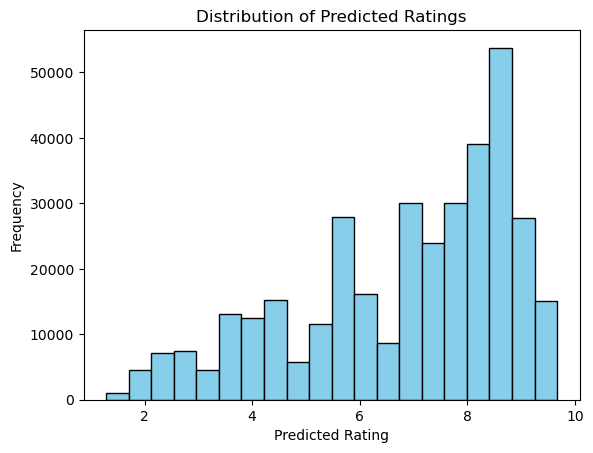

In [13]:
plt.hist(predictions_df['prediction'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.show()

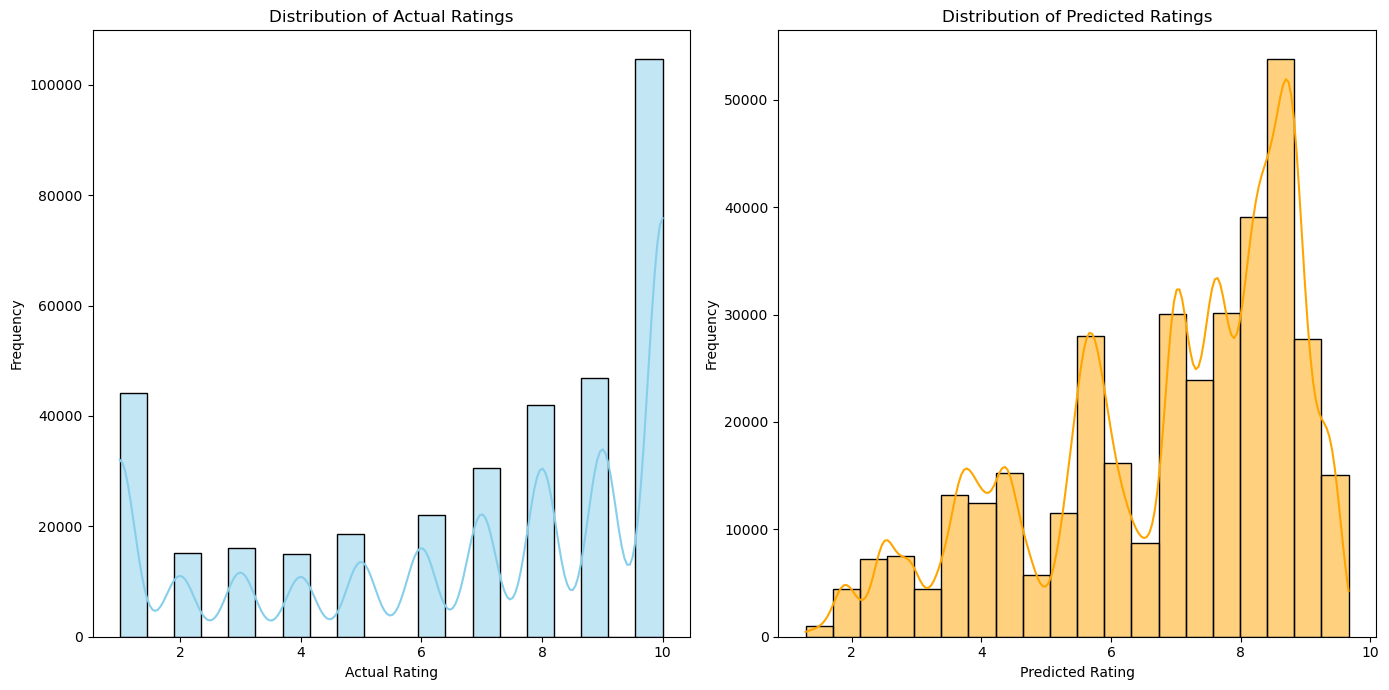

In [14]:
# Plot side-by-side histograms for actual and predicted ratings
plt.figure(figsize=(14, 7))

# Plot Actual Ratings Distribution
plt.subplot(1, 2, 1)
sns.histplot(predictions_df['rating'], kde=True, color='skyblue', bins=20, edgecolor='black')
plt.title('Distribution of Actual Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Frequency')

# Plot Predicted Ratings Distribution
plt.subplot(1, 2, 2)
sns.histplot(predictions_df['prediction'], kde=True, color='orange', bins=20, edgecolor='black')
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()